In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load map
file = open("day6.txt", "r")
content=file.readlines()
c = []
for l in content:
    c.append(l.strip())
content_array = np.array([list(x) for x in c])

In [3]:
#functions to use later
def locate_guard(m=content_array, guard='^'):
    l = np.where(m==guard)
    loc = l[0][0], l[1][0]
    return loc

def add_tup(x,y):
    z0 = x[0] + y[0]
    z1 = x[1] + y[1]
    return(z0,z1)

def turn_right(current_dir):
    if current_dir == 'UP':
        next_dir = 'RIGHT'
    elif current_dir == 'RIGHT':
        next_dir = 'DOWN'
    elif current_dir == 'DOWN':
        next_dir = 'LEFT'
    elif current_dir == 'LEFT':
        next_dir = 'UP'
    else:
        next_dir = None
        print("direction not valid - must be UP, DOWN, LEFT, or RIGHT")
    return next_dir

def is_in_bounds(tup, array):
    in_bounds = True
    x,y = tup[0], tup[1]
    xlim,ylim = array.shape[0], array.shape[1]
    if x < 0:
        in_bounds = False
    if y < 0:
        in_bounds = False
    if x >= xlim:
        in_bounds = False
    if y >= ylim:
        in_bounds = False
    return in_bounds

In [4]:
class adventGuard:
    dirdict = {'UP': (-1,0), 
               'DOWN': (1,0), 
               'LEFT':(0,-1), 
               'RIGHT':(0,1)}
    def __init__(self):
        self.themap = content_array.copy()
        self.location = (94, 73) #locate_guard()
        self.direction = 'UP'
        self.guardpathmap = np.zeros(self.themap.shape)
        self.guardpathmap[self.location] = 1
        self.in_bounds = True
        self.loopy = False
        self.path = {(self.location, self.direction)}
        
    def take_step(self):
        next_space = add_tup(self.location, self.dirdict[self.direction])
        if is_in_bounds(next_space, self.themap):
            if self.themap[next_space] == '.': #path is open
                #go straight
                self.location = next_space
            elif self.themap[next_space] == '#': #path is blocked
                self.direction = turn_right(self.direction)
                self.location = add_tup(self.location, self.dirdict[self.direction])
            self.guardpathmap[self.location] = 1 #mark guard location on math
            step = (self.location, self.direction)
            if step in self.path:
                self.loopy = True
            self.path.add((self.location, self.direction)) #track guard path
        else:
            self.in_bounds = False

    def add_obstacle(self, x,y):
        self.themap[x,y] = '#'

In [5]:
guard = adventGuard()
#guard.add_obstacle(93,60)
while guard.in_bounds and not guard.loopy:
    guard.take_step()

In [6]:
def show_guard_path(m):
    plt.figure(figsize=(8,8))
    plt.imshow(m, cmap='viridis', interpolation='nearest')
    plt.show()

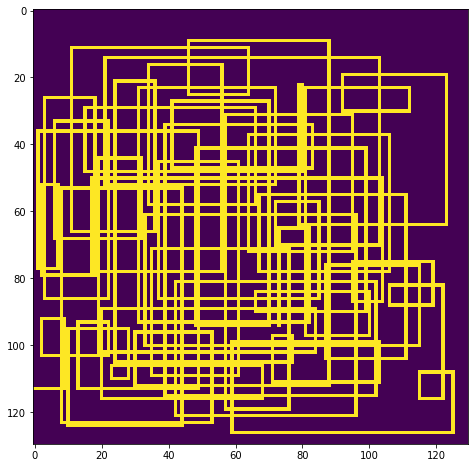

In [7]:
show_guard_path(guard.guardpathmap)
guardpath = guard.path

In [8]:
print("PART 1 ANSWER ==", sum(sum(guard.guardpathmap)))

PART 1 ANSWER == 5242.0


In [9]:
guardlocs = np.where(guard.guardpathmap==1)

In [10]:
len(guardlocs[0])

5242

In [11]:
score = {'oob': 0, 'stuck_in_loop':0}

for i in range(len(guardlocs[0])):
    guard2 = adventGuard()
    x = guardlocs[0][i]
    y = guardlocs[1][i]
    guard2.add_obstacle(x, y)
    while guard2.in_bounds and not guard2.loopy:
        guard2.take_step()
    if not guard2.in_bounds:
        score['oob'] = score['oob'] + 1
    if guard2.loopy:
        score['stuck_in_loop'] = score['stuck_in_loop'] + 1
    if i % 500 == 0:
        print("Completed step", i)
        print("Current Score:", score)
        #show_guard_path(guard2.guardpathmap)
print('FINAL SCORE:', score)

Completed step 0
Current Score: {'oob': 0, 'stuck_in_loop': 1}
Completed step 500
Current Score: {'oob': 367, 'stuck_in_loop': 134}
Completed step 1000
Current Score: {'oob': 734, 'stuck_in_loop': 267}
Completed step 1500
Current Score: {'oob': 1082, 'stuck_in_loop': 419}
Completed step 2000
Current Score: {'oob': 1450, 'stuck_in_loop': 551}
Completed step 2500
Current Score: {'oob': 1810, 'stuck_in_loop': 691}
Completed step 3000
Current Score: {'oob': 2189, 'stuck_in_loop': 812}
Completed step 3500
Current Score: {'oob': 2530, 'stuck_in_loop': 971}
Completed step 4000
Current Score: {'oob': 2907, 'stuck_in_loop': 1094}
Completed step 4500
Current Score: {'oob': 3243, 'stuck_in_loop': 1258}
Completed step 5000
Current Score: {'oob': 3582, 'stuck_in_loop': 1419}
FINAL SCORE: {'oob': 3762, 'stuck_in_loop': 1480}


In [ ]:
#Wrong answer -- FINAL SCORE: {'oob': 4165, 'stuck_in_loop': 1628}
#Other wrong answer -- 1479 [ FINAL SCORE: {'oob': 3762, 'stuck_in_loop': 1480} ]